# Question 3

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from setuptools.command.rotate import rotate

data = pd.DataFrame(pd.read_csv('TaxiData.csv'))

## 3.a Fare and Tip Distribution
### (a) Histograms and boxplots for fare and tip amounts
Here are the histograms drawn for both fare and tips

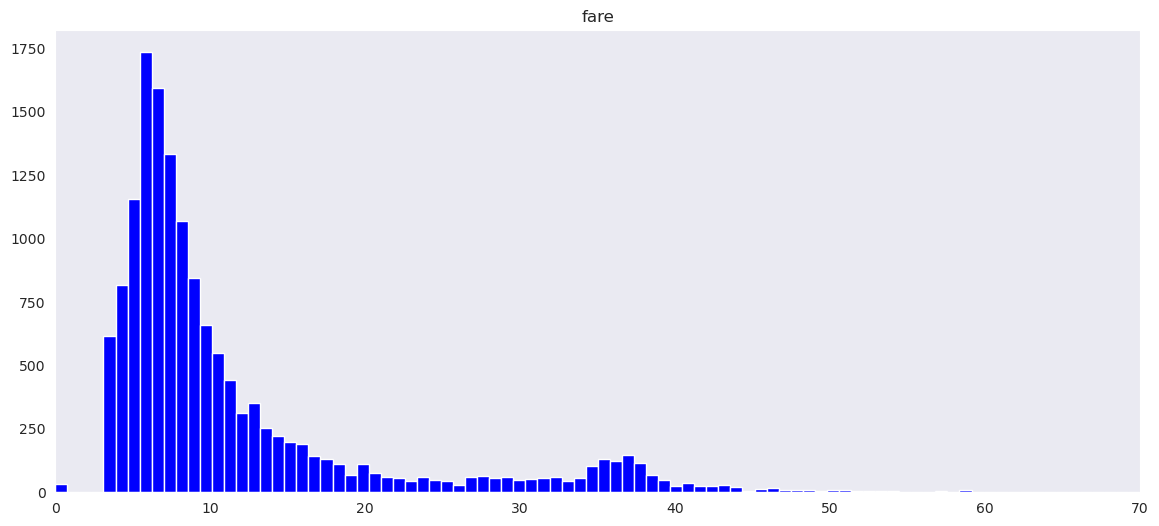

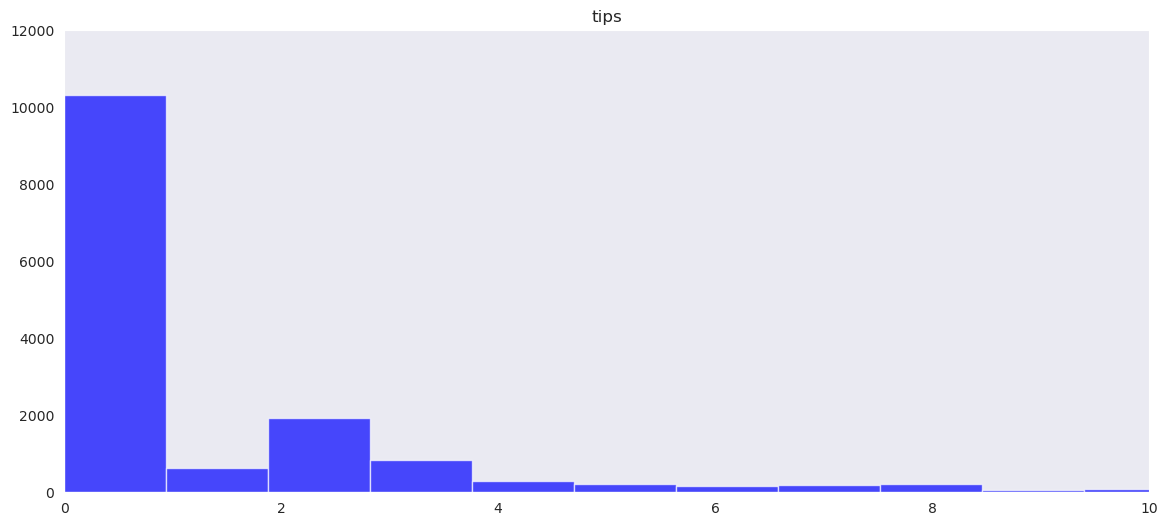

In [79]:
data.hist(column=['fare'], bins=900, grid=False, figsize=(14, 6), color='blue', alpha=1)
plt.xlim(0, 70)

data.hist(column=['tips'], bins=50, grid=False, figsize=(14, 6), color='blue', alpha=0.7)
plt.xlim(0, 10)
plt.ylim(0, 12000)
plt.show()

Here are the box plots for both fare and tips.

<AxesSubplot:>

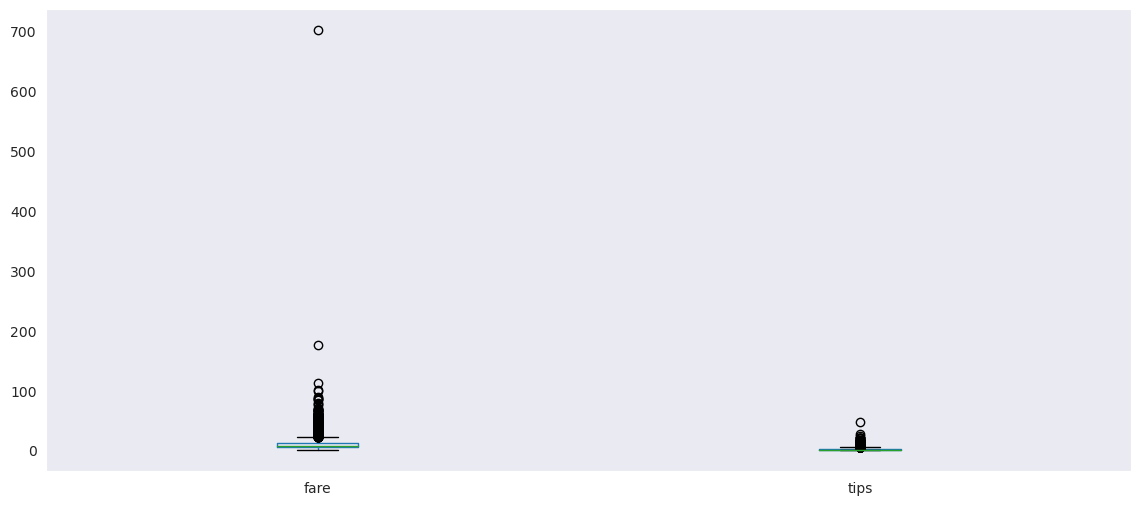

In [80]:
data.boxplot(column=['fare', 'tips'], grid=False, figsize=(14, 6))

## 3.b Payment Method Insights
### (a) Visualizing frequency of each payment method

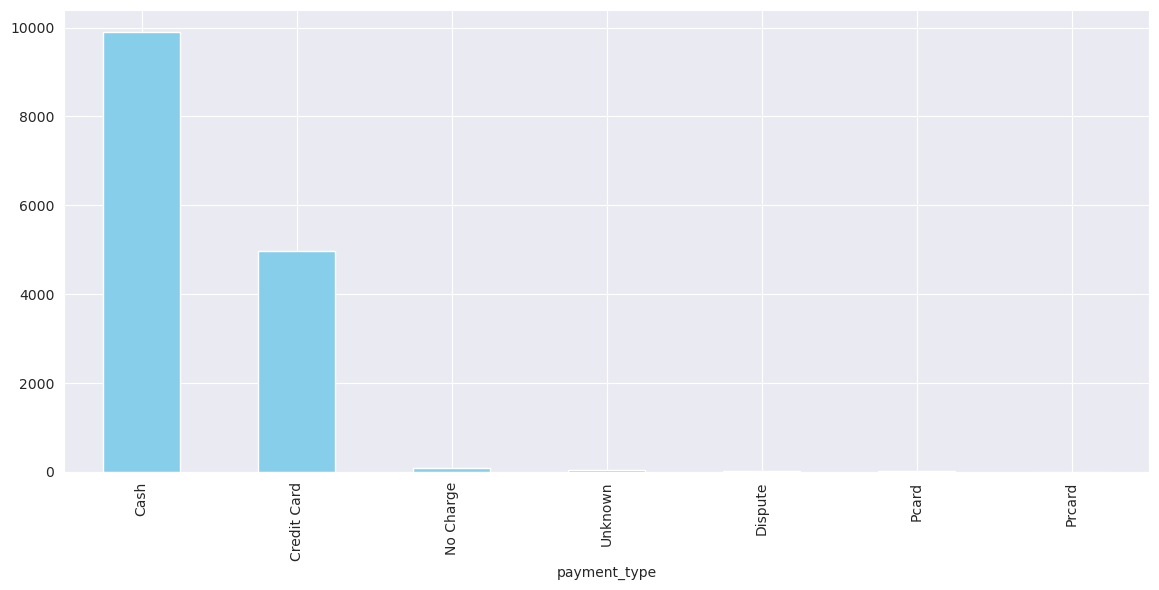

In [81]:
payment_counts = data['payment_type'].value_counts()
payment_counts.plot.bar(color='skyblue', figsize=(14, 6))
plt.show()

<AxesSubplot:ylabel='count'>

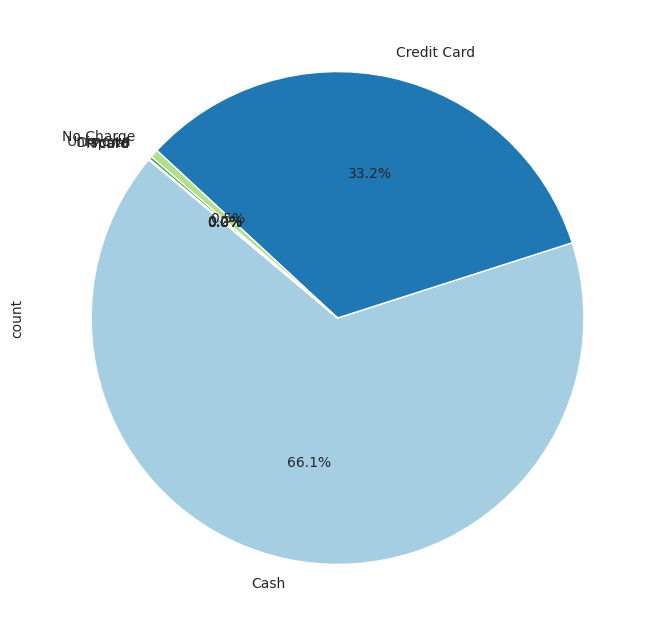

In [86]:
payment_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, figsize=(8, 8))


## 3.c Tips by Payment Method
### (a) A box plot comparing tips across different payment methods

<AxesSubplot:title={'center':'tips'}, xlabel='payment_type'>

<Figure size 1400x600 with 0 Axes>

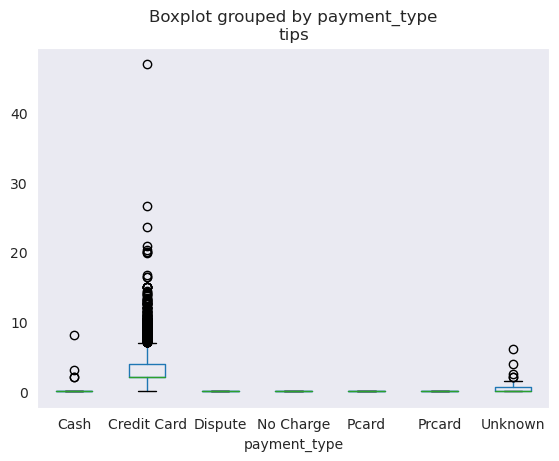

In [91]:
plt.figure(figsize=(14, 6))
data.boxplot(column='tips', by='payment_type', grid=False)

## 3.d Fare vs. Distance
### (a) Scatter plot showing relation between trip distance and fare

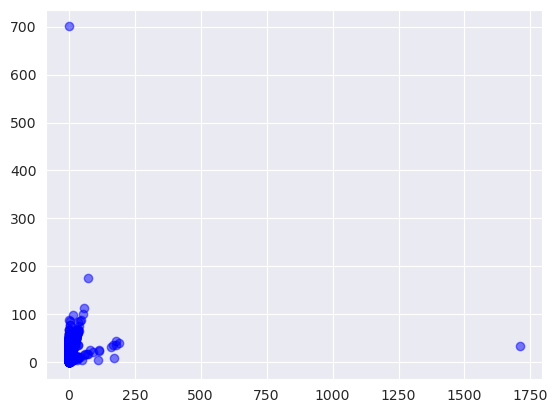

In [95]:
plt.scatter(data['trip_miles'], data['fare'], alpha=0.5, c='blue')

### (b) Correlation coefficient between two variables

In [97]:
correlation = data['trip_miles'].corr(data['fare'])
print(f'Correlation between trip miles and fare: {correlation}')

Correlation between trip miles and fare: 0.22380232969278896
